# **Variation: Graphical Analysis**

## ***Learning Objectives:***



*   Generate plots of $X$ vs. $dX/dt$ for single-ODE systems
*   Calculate fixed points and determine their stability using vector fields
*   Draw time-course plots from arbitrary initial conditions using graphical analysis
*   Understand how changing parameters can lead to bifurcation

When I ask my students about the most surprising moments they’ve experienced in my
systems biology course, the power of Boolean analysis is usually on their list. Many of
them are particularly caught off guard by the number of conditions that you can examine
simultaneously using this approach. By comparison, our ODE-based analytical approach
is relatively limited; we only looked at a couple of initial conditions, and had to make
pretty specific assumptions to get there.

What makes graphical analysis so exciting is that once again, we can examine many
initial conditions at once to see how the system will behave. We can also deduce the
ranges of initial conditions for which the response will be similar, and we can even
characterize how parameter changes lead to dramatic, qualitatively different altered
responses.

Also, graphical analysis is beautiful. There’s not a single figure I’ll show you here that I wouldn’t love to put on my wall at home! This aesthetic quality also helps your intuition; by visualizing many responses at once, your eyes and mind will help you to identify patterns that you can remember.

## **Section 4.1. Revisiting the protein-synthesis ODEs**

Let’s start with our ODE descriptions of our circuits in which the protein concentration
varies without (Figure 3.1A) and with (Figure 3.1B) feedback, taken from Equations [3.23](https://colab.research.google.com/drive/1vgWo_TjxyWUQdXecbyZmNAX38InvXJ-k#scrollTo=ceZQ1LS-lewd) and [3.39](https://colab.research.google.com/drive/1vgWo_TjxyWUQdXecbyZmNAX38InvXJ-k#scrollTo=CDIkEWRZsfqN), respectively:

> <h3> $\frac{d[Protein]}{dt} = 0 = k_{trl,max} − k_{ploss}[Protein]_{ss}$

*(Equation 4.1)*

> <h3> $\frac{d[Protein]}{dt} = \frac{k_{trl,max}}{1+[Protein]/ K} − k_{ploss}[Protein]$

*(Equation 4.2)*

Remember that $k_{trl,max}$ is a constitutive (constant) production rate, and kploss is a rate
constant that describes the relationship between protein concentration and protein loss over time, based on an assumption of mass action kinetics. The more complicated
production term in Equation 4.2 also assumes mass action kinetics, but here it reflects the binding of repressor protein to DNA to form an inactive complex, and the dissociation of that complex.

We solved these equations in the last chapter. The solution to Equation 4.1 is:

> $[Protein](t) = [Protein]_{ss}(1− e^{-k_{ploss}t})$

*(Equation 4.3)*

where:

> <h3> $[Protein]_{ss} = \frac{k_{trl,max}}{kploss}$

*(Equation 4.4)*

We then plotted Equation 4.3 [(Figure 3.6)](https://colab.research.google.com/drive/1vgWo_TjxyWUQdXecbyZmNAX38InvXJ-k#scrollTo=4PcVGqxkmmeC) to visualize the dynamics of the system
responding to a sudden increase in expression, starting at [Protein] = 0; this plot is shown
again in Figure 4.1, but notice the new annotations in black and grey. First, in grey I’ve
plotted the quantity ktrl,max*t. At small values of t, when the response of the circuit has

just started, the grey dashed line is a very good approximation of the response. Re-
examination of Equation 4.1 reveals that when not much time has passed, the protein

concentration is very low and the loss term is close to zero, leaving an equation in which
d[Protein]/dt ~ ktrl,max. At larger values of t, the response is well approximated by the
black dashed line, which is simply the steady-state protein concentration. At early times
the rate of change is therefore approximately ktrl,max, and at late times the rate of change is
zero.

![Figure 4.1](https://drive.google.com/uc?export=view&id=1IBaJOeC3NmUuFJrD9L1bkLvyaq_s5KOz)

> **Figure 4.1 (see also Figure 3.6). The response of our system (without feedback)
to a sudden increase in protein expression.** The initial increase in protein
concentration closely approximates the translation rate (dashed light grey), but
eventually the system plateaus to a steady state (dashed black).

## **Section 4.2. Plotting $X$ versus $dX/dt$**

Let’s look at the rates of change in another way: still graphically, but this time plotting the variable value versus the variable’s change over time. For our case, this strategy means plotting the protein concentration against the protein concentration over time, or $[Protein]$ vs. $d[Protein]/dt$. The plot in Figure 4.2 is a straight line, with the y-intercept at
$k_{trl,max}$ and a slope of $-k_{ploss}$. You could also determine these values by examining Equation 4.1, but you can gain insight about the system by visualizing it as a graph and comparing it to Figure 4.1.

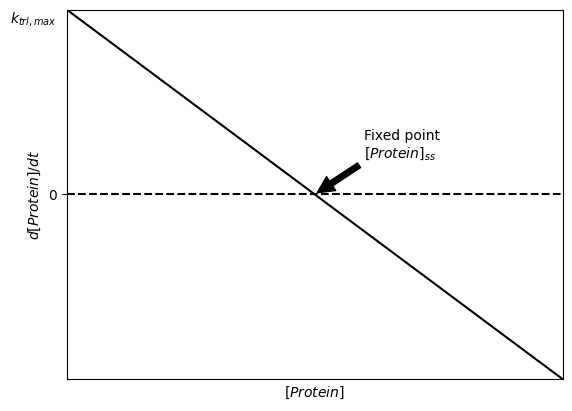

In [ ]:
import matplotlib.pyplot as plt

# Define the x and y values
x = [-5, 5]  # [Protein]
y = [5, -5]  # d[Protein]/dt

# Plot the line
plt.plot(x, y, 'k-')

# Add labels and title
plt.xlabel('$[Protein]$')
plt.ylabel('$d[Protein]/dt$')


# Add the fixed point annotation
fixed_point_x = 0
fixed_point_y = 0
plt.annotate('Fixed point\n$[Protein]_{ss}$', xy=(fixed_point_x, fixed_point_y), xytext=(fixed_point_x + 1, fixed_point_y + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(-5.2, 5, '$k_{trl,max}$', va='top', ha='right', fontsize=10)


# Add dashed line for y=0
plt.axhline(y=0, linestyle='--', color='black')

# Remove tick values
plt.xticks([])
plt.yticks([0])

# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Show the plot
plt.show()

> **Figure 4.2. Comparing the change in protein concentration over time to the
protein concentration reveals a linear relationship.** As in Figure 4.1, the initial change in protein concentration over time mirrors the translation rate. The steady-
state protein level occurs at d[Protein]/dt = 0; this point is called a “fixed” point.

In particular, notice that ktrl,max is the instantaneous rate of change for the protein
concentration over time when the protein concentration is equal to zero – our initial
conditions in Figure 4.1. You can also determine the steady-state protein concentration
simply by finding the spot on the graph where $d[Protein]/dt = 0$.

## **Section 4.3. Fixed points and vector fields**

Such points, where the derivative of the variable is equal to zero, are called fixed points
of the system. One notable aspect of Figure 4.2 is that there is one and only one fixed
point.

Fixed points can be either stable or unstable, with a critical impact on the system’s
behavior. Think of stability the way we discussed in earlier chapters, beginning with
Boolean analysis: if the system reaches a stable state, it will remain in that state.
Likewise, a system in an unstable state moves away from that state.

In our case, you might already guess that the fixed point is stable because the trajectory in
Figure 4.1 continues to approach it over time, but let’s take this opportunity to show how you could infer this if you didn’t already know – by drawing a **vector field**. The vector
field is an indicator of how much and in which direction the derivative is changing at a
given variable value. We will use our vector field to answer two questions. First, for a
given protein concentration, will the rate of change be positive or negative? Second, how
fast will the concentration change in that positive or negative direction?

![Figure 4.3](https://drive.google.com/uc?export=view&id=1Ull7ALX-CWSG_InkwvOmnUojlAyK56gh)

> **Figure 4.3. The vector field for the system in Figure 4.2.** The arrows indicate
the magnitude and direction of the change of $d[Protein]/dt$ as we approach the
stable fixed point (filled circle). This vector field allows us to predict the
system’s response to any set of initial conditions.

The vector field for our system is shown in Figure 4.3 as a set of red arrows on the
$d[Protein]/dt = 0$ line. We draw it by looking at the sign and magnitude of the
$d[Protein]/dt$ value for a given protein concentration; for example, at [Protein] = 0,
$d[Protein]/dt = k_{trl,max}$ , a positive value that will result in a higher protein concentration
over time. We therefore draw an arrow in the positive direction beginning at $[Protein] =
0$.

If we move slightly to the right on the x-axis to higher protein concentrations, we see that
$d[Protein]/dt$ is still positive, but not as large as it was for $[Protein] = 0$. Accordingly, we
draw another arrow, still pointing in the positive direction, but not as long (sometimes
people make the arrow the same length as the value of $d[Protein]/dt$, but for now let’s
just look at the arrow lengths relative to each other). As we move slightly farther to the
right, we find a relatively small but positive value of $d[Protein]/dt$ and draw a short,
right-pointing arrow to reflect it. Finally, there’s no change in protein concentration at
the fixed point, so let’s draw a circle around that point. The stability of fixed points is
often denoted by marking stable fixed points with filled circles and unstable fixed points
with empty circles, so we fill in our fixed point as well.

This next concept is important: the vector field that we’ve drawn is so far an equivalent way of representing the trajectory of the system represented in Figure 4.1. Beginning at $[Protein] = 0$, the rate of change is maximal, after which it steadily and linearly decreases
until the protein concentration reaches a steady value of $d[Protein]/dt = 0$. This decrease
in rate produces the concave-down shape of the trajectory in Figure 4.1.

Now let’s complete the vector field and examine the conditions under which the protein concentration is greater than the steady-state level, $[Protein] > [Protein]_{ss}$. Starting at the right side of the x-axis, we see high values for the protein concentration, $d[Protein]/dt < 0$, so we draw arrows pointing to the left, and again the arrows become shorter as we approach the steady-state value until we reach the steady state.

## **Section 4.4. From vector fields to time course plots**

From this vector field we can now predict the response of the system to any set of initial conditions. Specifically, if the system begins with $[Protein] < [Protein]_{ss}$, the protein concentration will increase at a steadily decreasing rate over time until it reaches the steady-state level, producing a concave-down trajectory. If the system starts at $[Protein] > [Protein]_{ss}$, the protein concentration will decrease at a steadily decreasing rate until it reaches that same steady-state level, producing a concave-up trajectory. Since the trajectories on either side approach the fixed point, we call it a stable state.

Some sample trajectories appear in Figure 4.4. I used MATLAB to draw this figure, but I
want you to see that it’s not necessary; likewise, you don’t need the analytical solution. You could draw this figure by hand and amaze your friends with what you know about the vector field.

**insert figure 4.4 here**

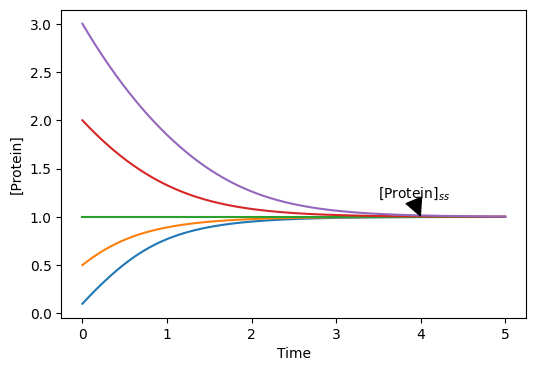

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the protein dynamics
def protein_dynamics(protein, t, k_syn, k_deg, n):
    return k_syn / (1 + np.power(protein, n)) - k_deg * protein

# Parameters
k_syn = 1.0    # Synthesis rate constant
k_deg = 0.5    # Degradation rate constant
n = 4          # Hill coefficient
t_final = 5   # Final time

# Time points
t = np.linspace(0, t_final, 1000)

# Initial conditions
protein0 = np.array([0.1, 0.5, 1.0, 2.0, 3.0])

# Solve the ODEs
solutions = []
for p0 in protein0:
    solution = np.zeros_like(t)
    solution[0] = p0
    for i in range(1, len(t)):
        solution[i] = solution[i-1] + protein_dynamics(solution[i-1], t[i] - t[i-1], k_syn, k_deg, n) * (t[i] - t[i-1])
    solutions.append(solution)

# Plot the solutions
plt.figure(figsize=(6, 4))
for solution in solutions:
    plt.plot(t, solution)

# Labels and annotations
plt.xlabel('Time')
plt.ylabel('[Protein]')
plt.annotate('[Protein]$_{ss}$', xy=(t_final*0.8, solutions[-1][-1]), xytext=(t_final*0.7, solutions[-1][-1] + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

> **Figure 4.4. Sample trajectories of the system in Figure 4.2 given different
initial starting conditions.** All trajectories converge on the steady-state protein level, which appeared as a fixed point in Figure 4.3.

## **Section 4.5. Nonlinearity**

In this first example, we looked at a case in which there was a linear relationship between $[Protein]$ and $d[Protein]/dt$. Now let’s look at a slightly altered version of Equation 4.1, incorporating nonlinearity with a second-power term:

> <h3> $\frac{d[Protein]}{dt} = k_{trl,max} − k_{ploss}[Protein]^2$

*(Equation 4.5)*

Such an equation may be appropriate if, for example, protein dimerization were required
for the complex to be degraded (these systems do exist). You can see from Equation 4.5 that if $[Protein] = 0$, then $d[Protein]/dt = k_{trl,max}$ , just as before. The steady-state solution,
however, is slightly different:

> <h3> $[Protein]_{ss} =± \sqrt{\frac{k_{trl,max}}{k_{ploss}}} $

*(Equation 4.6)*

In reality, the protein concentration must be positive, but for learning purposes let’s
consider all possible solutions of the equation. The plot of Equation 4.5 (Figure 4.5)
crosses the y-axis at ktrl,max just as before, but now there are two fixed points, one at the
positive solution of $[Protein]_{ss}$ and the other at the negative solution.

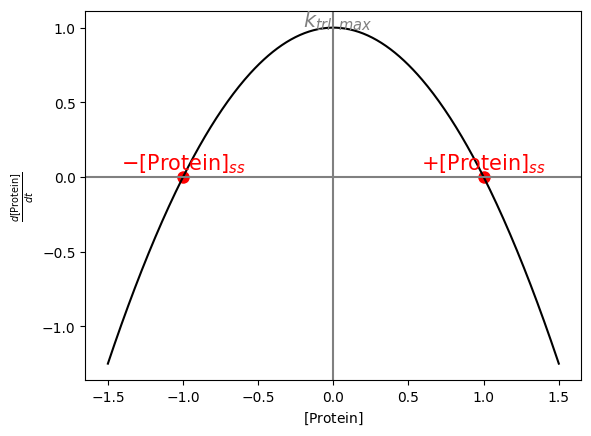

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def dProtein_dt(Protein, k_trl_max=1):
    return k_trl_max * (1 - (Protein**2))

# Generate data points for the plot
Protein = np.linspace(-1.5, 1.5, 400)
dProtein = dProtein_dt(Protein)

# Plot the curve
plt.plot(Protein, dProtein, color='black')

# Add horizontal and vertical lines at 0
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Mark the steady state points
steady_states = [-1, 1]
plt.scatter(steady_states, [0, 0], color='red', s=100, edgecolors='white')

# Annotate the steady state points
plt.text(-1, 0.05, r'$-[\mathrm{Protein}]_{ss}$', fontsize=15, color='red', ha='center')
plt.text(1, 0.05, r'$+[\mathrm{Protein}]_{ss}$', fontsize=15, color='red', ha='center')

# Annotate the maximum transcription rate
plt.text(-0.2, 1, r'$k_{trl,max}$', fontsize=15, color='grey')

# Set labels and title
plt.xlabel(r'$[\mathrm{Protein}]$')
plt.ylabel(r'$\frac{d[\mathrm{Protein}]}{dt}$')

# Show the plot
plt.show()


> **Figure 4.5. Plotting Equation 4.5 to visualize a nonlinear relationship between
protein concentration and the change in protein concentration over time.**
Although two fixed points appear in the figure, protein concentration must be positive
in living cells.

## <u> **Practice Problem 4.1** </u>

*Draw the vector field and determine the stability of each fixed point in Figure 4.5. Then
plot the protein concentration over time under the following initial conditions:*

(1)    $[Protein]_0 = 0$;

(2)    $[Protein]_0 < -[Protein]_{ss}$;

(3)    $-[Protein]_{ss} < [Protein]_0 < 0$;

(4)    $0 < [Protein]_0 < +[Protein]_{ss}$;

(5)    $[Protein]_0 > +[Protein]_{ss}$.

**Solution:** The vector field appears in Figure 4.6. At the left side of the plot,
$d[Protein]/dt$ is very negative, and so the protein concentration continues to drop. The
rate of change increases but remains negative as the left-most fixed point is approached.

![Figure 4.6](https://drive.google.com/uc?export=view&id=1qXpyW3tH2NUJRUTEsRJskTOF08fVW4hW)

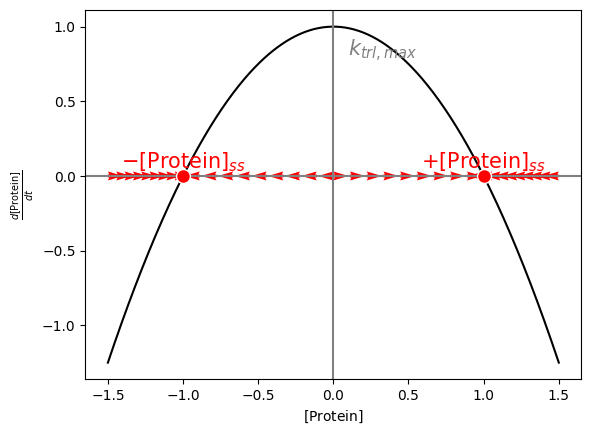

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def dProtein_dt(Protein, k_trl_max=1):
    return k_trl_max * (1 - (Protein**2))

# Generate data points for the plot
Protein = np.linspace(-1.5, 1.5, 400)
dProtein = dProtein_dt(Protein)

# Plot the curve
plt.plot(Protein, dProtein, color='black')

# Add horizontal and vertical lines at 0
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Mark the steady state points
steady_states = [-1, 1]
plt.scatter(steady_states, [0, 0], color='red', s=100, edgecolors='white', zorder=5)

# Annotate the steady state points
plt.text(-1, 0.05, r'$-[\mathrm{Protein}]_{ss}$', fontsize=15, color='red', ha='center')
plt.text(1, 0.05, r'$+[\mathrm{Protein}]_{ss}$', fontsize=15, color='red', ha='center')

# Annotate the maximum transcription rate
plt.text(0.1, 0.8, r'$k_{trl,max}$', fontsize=15, color='grey')

# Add arrows using quiver
X_unstable = np.linspace(-1.5, -1, 10)
Y_unstable = np.zeros_like(X_unstable)
U_unstable = np.ones_like(X_unstable) * 0.1
V_unstable = np.zeros_like(X_unstable)
plt.quiver(X_unstable, Y_unstable, U_unstable, V_unstable, color='red', scale=1, scale_units='xy', angles='xy')

X_stable = np.linspace(1, 1.5, 10)
Y_stable = np.zeros_like(X_stable)
U_stable = -np.ones_like(X_stable) * 0.1
V_stable = np.zeros_like(X_stable)
plt.quiver(X_stable, Y_stable, U_stable, V_stable, color='red', scale=1, scale_units='xy', angles='xy')

# Add arrows pointing towards the steady states
X_mid_left = np.linspace(-1, 0, 10)
Y_mid_left = np.zeros_like(X_mid_left)
U_mid_left = -np.ones_like(X_mid_left) * 0.1
V_mid_left = np.zeros_like(X_mid_left)
plt.quiver(X_mid_left, Y_mid_left, U_mid_left, V_mid_left, color='red', scale=1, scale_units='xy', angles='xy')

X_mid_right = np.linspace(0, 1, 10)
Y_mid_right = np.zeros_like(X_mid_right)
U_mid_right = np.ones_like(X_mid_right) * 0.1
V_mid_right = np.zeros_like(X_mid_right)
plt.quiver(X_mid_right, Y_mid_right, U_mid_right, V_mid_right, color='red', scale=1, scale_units='xy', angles='xy')

# Set labels and title
plt.xlabel(r'$[\mathrm{Protein}]$')
plt.ylabel(r'$\frac{d[\mathrm{Protein}]}{dt}$')

# Show the plot
plt.show()


> **Figure 4.6. The vector field for the system in Practice Problem 4.1.** The left
fixed point is unstable, as indicated by the arrows facing away from the point.

Just to the right of that fixed point, the rate of change is slow but positive, and increases
until it reaches a maximum value at $[Protein] = 0$. As $[Protein]$ becomes more positive,
the rate decreases until it becomes zero at the right-most fixed point. At more positive
values, the rate once again becomes negative, pointing toward that fixed point.

To determine the stability of each fixed point, notice that the vectors on either side of the right-most fixed point are pointing toward that fixed point, just as we saw in Figure 4.3. This point is therefore a stable state of the system. In contrast, the vectors on either side of the left-most fixed point are directed away from that point, resulting in an unstable state.

You can easily sketch out the responses to any of the initial conditions using the vector field in Figure 4.6; some examples appear in Figure 4.7. Notice that time courses beginning near $-[Protein]_{ss}$ all move away from that fixed point, while time courses beginning near $+[Protein]_{ss}$ move toward that value.

![Figure 4.7](https://drive.google.com/uc?export=view&id=1m6wn75CntV45wJhxmAB6PJoNfgJ_MuPm)


> **Figure 4.7. Responses of the system in Practice Problem 4.1, given different
starting conditions.** The inflection point in Figure 4.6 is indicated at $[Protein] = 0$, and the positive and negative fixed points are indicated at $[Protein] = +/-[Protein]_{ss}$.

If we focus on the time courses that start at protein concentrations between 0 and -
$[Protein]_{ss}$, we see that these trajectories begin by moving away from the unstable fixed
point at an increasing rate as they approach $[Protein] = 0$. The shape of this curve, a
slower change in $[Protein]$ that increases over time, can be described as “concave up.”
After the time courses cross the $[Protein] = 0$ line, however, they begin moving toward
the stable fixed point with a decreasing rate, resulting in a “concave down” shape. The point at which the dynamics switch from concave up to concave down is called an
inflection point.

## **Section 4.6. Bifurcation analysis**

Changing the values of key parameters in an ODE can have a dramatic effect on the
dynamics of your system, and graphical methods can powerfully illustrate these effects.

Practice Problem 4.2 gives a pertinent example.

## <u> **Practice Problem 4.2** </u>

*Repeat the steps performed in Practice Problem 4.1 for $k_{trl,max} < 0$ and $k_{trl,max} = 0$. Draw vector fields, identify and characterize the fixed points, and sketch time courses for representative initial conditions. Don’t use MATLAB until you’ve tried it by hand! Do either of these values of $k_{trl,max}$ have any biological relevance?*

Solution: When $k_{trl,max}$ is negative (Figure 4.8, top), there are no fixed points, but $[Protein] = 0$ remains an inflection point where $d[Protein]/dt$ switches from decreasing in magnitude to increasing in magnitude. When $k_{trl,max} = 0$ (corresponding to complete
repression of gene expression; Figure 4.8, bottom), there is only one fixed point; this point is unusual because the vector field on the left side of the fixed point is directed
away, while the vector field on the right is oriented toward the fixed point. This point is therefore a half-stable fixed point, since any time course with initial conditions of $[Protein]_0 > 0$ will approach a steady state of $[Protein] = 0$, while initial conditions of
$[Protein]_0 < 0$ lead to rapidly decreasing protein concentrations.

![Figure 4.8](https://drive.google.com/uc?export=view&id=1KopNI2BSX6wqAJBR2NZF74EBOOLJE-9d)

> **Figure 4.8. The value of ktlr,max influences the number of fixed points (Practice Problem 4.2).** Above, when $k_{trl,max}$ is negative, there are no fixed points. Note thehalf-stable point. Below, when $k_{trl,max} = 0$, a half-stable point occurs at $[Protein] = 0$.

A most interesting conclusion can therefore be drawn from our analysis: the number of
fixed points, a critical determinant of system dynamics, depends on the value of $k_{trl,max}$.
Figure 4.9A summarizes the vector fields that we produced in Figures 4.6-4.8. When
$k_{trl,max}$ is large and positive, the fixed points, one unstable and one stable, are located at a
certain distance that becomes smaller and smaller as $k_{trl,max}$ approaches zero. At $k_{trl,max} =
0$, the two fixed points fuse into one half-stable fixed point, which disappears at negative
values of $k_{trl,max}$.

![Figure 4.9](https://drive.google.com/uc?export=view&id=1xljOV-CAn6a34hTeAxkAX-uVFiEHA23u)

> **Figure 4.9. Summary of the observations in Practice Problem 4.2.** (A)
Schematic of the changes in the vector field for different values of $k_{trl,max}$. Stable
fixed points appear as filled circles, unstable fixed points are empty circles, and
the half-stable fixed point is half shaded. (B) Using a bifurcation diagram to
visualize the effect of $k_{trl,max}$ on protein concentration at the fixed points.

Figure 4.9B (plotted from Equation 4.6) depicts the relationship between $k_{trl,max}$ and the fixed points in more detail. A change in the number of fixed points, caused by a change in parameter values, is called a **bifurcation,** and the plot in Figure 4.9B is called a **bifurcation diagram.** There are many types of bifurcations; this case illustrates a **saddle-node bifurcation.**

With regard to relevance, it’s biologically impossible to have a ktrl,max less than zero, but
sometimes, for example, in the case of the inducible promoter that we considered in
Chapter 3, transcription can be halted, and therefore $k_{trl,max} = 0$.

To summarize what we’ve seen so far in this chapter, graphical analysis enables us to
quickly visualize the results of changing initial conditions or parameters, much like our previous Boolean analysis, but in more detail.

##**Section 4.7. Adding feedback**

Now that we’ve addressed the system without feedback described in Equation 4.1, let’s
move to the system with feedback shown in Equation 4.2. The protein production term in
this equation is substantially more complicated than in Equation 4.1, making the entire
equation somewhat more difficult to plot without the aid of a computational tool.

Fortunately, there is an easier way to generate our vector field: instead of plotting the
complete equation for $d[Protein]/dt$, we can plot each term (the production rate $(v_{prod})$ and the loss rate $(v_{loss})$) on the right side of the equation separately and compare those two
plots.

![Figure 4.10](https://drive.google.com/uc?export=view&id=1rSfxsnhplQOJAJaCA7APeFE7inbCuzbg)

> **Figure 4.10. Graphing the dynamics of the system (with feedback) in
Equation 4.2.** (A) Protein production (grey) and loss (black) in the system.
(B) The vector field reveals a single stable fixed point.

Comparing the magnitude of the protein production (Figure 4.10A, grey) and loss (Figure
4.10A, black) rates yields the vector field (Figure 4.10B). At low protein concentrations,
protein production is substantially greater than protein loss, so we draw an arrow toward
higher protein concentrations (pointing to the right). Moving rightward, the difference
between the production and loss rates shrinks, and thus the arrows pointing right are
shorter. High protein concentrations lead to a loss rate that is higher than the production
rate, and so the vectors at high concentrations point to the left. Finally, there is a single
point at which the production rate is equal to the loss rate, and therefore $d[Protein]/dt = 0$.
This point is fixed, and because the vectors in the field all point toward this point, we
know that it is a stable fixed point.

Let’s think about whether changing some of our parameters would lead to a bifurcation.
Figure 4.11 illustrates the outcome of changing kploss, ktrl,max, and K individually. In each
case, the protein production and loss rates only meet at a single point, and as a result,
changing these parameters will not lead to a bifurcation.

![Figure 4.11](https://drive.google.com/uc?export=view&id=1lBwJq8dupuSPCS0JWotQr2ZFeLoSWLjX)

> **Figure 4.11. The effects of changing kploss (A), ktrl,max (B), or K (C) in Equation 4.2 on
the position of the fixed point. Protein production is shown in grey and protein loss
appears in black.** The point at which the grey and black lines intersect is the fixed point of
the system. Notice that none of these changes lead to a bifurcation; there is only one fixed
point in each of the intersections shown.

## **Section 4.8. Two-equation systems**

Until now we have focused on graphical analysis of single equations. However, our
original system depended on two equations, one for protein, and another for mRNA:

> <h3> $\frac{d[Protein]}{dt} = k_{trl}[mRNA] - k_{ploss}[Protein]$

*(Equation 4.7)*

> <h3> $\frac{d[mRNA]}{dt} = k_{trs}(\frac{1}{1+[Protein]/K})-k_{mloss}[mRNA]$

In Chapter 3, we assumed that the mRNA concentration reaches a steady state much
more quickly than the protein concentration, which enabled us to solve Equation 4.8 for $d[mRNA]/dt = 0$, and then to substitute the resulting value of $[mRNA]$ into Equation 4.7 to obtain Equation 4.2. In this case, we want to solve both equations together without
making any additional assumptions; graphical analysis will be very helpful.

We have two variables to worry about instead of one, but otherwise our approach will be
similar to our approach for single equations. We’ll start by considering all the steady
states together and drawing nullclines, which are the steady-state solutions of each
equation in the system. As usual, we set $d[Protein]/dt$ and $d[mRNA]/dt$ equal to zero, and solve for *mRNA* in terms of *Protein*:

> <h3> $[mRNA]_{ss} = \frac{k_{ploss}}{k_{trl}}[Protein]_{ss}$

*(Equation 4.9)*

> <h3> $[mRNA]_{ss} = \frac{k_{trs}}{k_{mloss}}(\frac{1}{1+[Protein]_{ss}/K})$

*(Equation 4.10)*

Figure 4.12 contains plots of both of these lines for $K = k_{ploss}/k_{trl} = k_{trs}/k_{mloss} = 1$. This plot
looks a lot like Figure 4.10, and for good reason, since they depict the same equations.
This shouldn’t surprise you because our second system is a more complicated version of
our first system. Notice that there is only one point of intersection between the
nullclines, and we identify those coordinates by solving Equations 4.9 and 4.10 (0.62,
0.62). This location reflects the point at which the protein and mRNA levels, and
therefore the system as a whole, are at a steady state.

![Figure 4.12](https://drive.google.com/uc?export=view&id=1NuU3CIpmNPkLD6SbulzZ-kaNwi3V1vRH)

> **Figure 4.12. Including the change in mRNA production in our analysis of
the system with feedback.** In this two-dimensional case, the black and grey
lines are nullclines. Also notice the similarity to Figure 4.10.

Once again, we draw the vector field to determine how the system approaches that steady state. Let's start with four individual vectors at each ccorner of the plot in Figure 4.12; the first vector will be the origin of (0,0). If we substitute these values for *Protein* and *mRNA* into Equations 4.7 and 4.8, we obtain:

> <h3> $\frac{d[Protein]}{dt} = [mRNA] - [Protein] = 0 - 0 = 0$

*(Equation 4.11)*

> <h3> $\frac{d[mRNA]}{dt} = (\frac{1}{1+[Protein]}) - [mRNA] = 1 - 0 = 1$

*(Equation 4.12)*

As a result, we draw a vector that points upwards in the y direction. Using the same
approach, we identify the three other corners of the plot (Figure 4.13A) and draw the four
vectors (Figure 4.13B).

![Figure 4.13](https://drive.google.com/uc?export=view&id=1-82Icp3Sl4tQnLezpX_GSSRd-ugEpLf8)

> **Figure 4.13. Computing (A) and visualizing (B) the vector field for our
system with feedback.** Note that the outside vectors do not point at the fixed
point. The vector lengths shown here are scaled down 1:4 to facilitate
visualization.

You see that it’s fairly easy to calculate what $d[Protein]/dt$ and $d[mRNA]/dt$ should be, given any initial conditions. Even with this small beginning, you may notice a few
things, for example that these outside vectors do not point directly at the fixed point, and that there are times when only the protein concentration or only the mRNA concentration changes as the immediate response to a set of initial conditions.


A computational package such as MATLAB makes these calculations even easier, and
you’ll learn how to perform some of these calculations in the problems at the end of the
chapter. A much more complete vector field, generated using MATLAB, appears in
Figure 4.14A.


Notice that the vectors seem to spiral toward the fixed point, allowing us to conclude that
the fixed point is stable. For further evidence, we can plot specific trajectories on the vector field using the same four initial conditions that we considered in Figure 4.13B, for example. These trajectories (also calculated by solving the ODEs numerically in MATLAB) indeed all move toward the stable fixed point (Figure 4.14B).

However, they do not move directly; all four trajectories are curved (Figure 4.14B). In
some cases, the trajectory even passes the fixed-point value of either $[mRNA]$ or $[Protein]$ before reaching a steady state at both values.

These interesting aspects of the trajectories carry over to the time courses. Figure 4.14C
depicts the dynamic responses of $[mRNA]$ and $[Protein]$ given initial conditions with both
concentrations equal to zero. The corresponding red trajectory in Figure 4.14B begins at the origin and moves up and to the right before reaching the stable fixed point. The mRNA concentration rises quickly, overshoots the steady-state value, and then returns to it, while the protein concentration undergoes a more simple rise to the steady-state value.

![Figure 4.14](https://drive.google.com/uc?export=view&id=1dxqO_HF0dgyJtPsNMPbmGEh3CpZVyVdb)

> **Figure 4.14. Visualizing the changes in mRNA and protein concentration in
our system with feedback.** (A) The complete vector field and fixed point. (B)
Plotting trajectories (red) for the four initial conditions in Figure 4.13 demonstrates
that the system moves toward the stable fixed point. (C) The dynamic responses
of the mRNA (grey) and protein (black) concentrations over time. Notice that
[mRNA] overshoots the stable state. The MATLAB functions `meshgrid` and
`quiver` were used to create the vector fields in (A) and (B).

Other trajectories lead to different time courses, but you can see from the vector field that overshoot commonly occurs by one variable or the other. These time courses were drawn using MATLAB, but the real key to drawing them is the vector field.



I hope you can see that graphical analysis has several nice features. First, we exploit the specificity and detail that accompany ODEs, but like the Boolean approach we are able to examine many responses simultaneously to obtain an idea of how the system works in general. We can also relax some of the necessary assumptions to make analytical solutions of ODEs tractable; note, for example, that the results in Figure 4.14C are inconsistent with our earlier assumption (made largely for reasons of expediency) that the mRNA concentration reaches a steady state before the protein concentration. Finally, we can see how parameter changes affect system dynamics.



The challenge with these approaches is that it is somewhat difficult to visualize information in multi-dimensional space. As a result, the graphical approach is powerful for two- or three-dimensional systems, but not for higher systems. If our system is small enough, however, or if we can make a realistic reduction in the complexity of our system, it’s hard to beat graphical approaches for the intuition they can give us.

## **Chapter Summary**

Graphical analysis can lead us to deeper intuition about ODEs by enabling us to identify
stable and unstable states, to plot dynamics, and to consider the effects of varying initial
conditions and parameter values, rapidly and without any need for a computer. We began
with a single ODE system, plotting the values of a given variable (some variable $X$)
against the change in that variable over time ($dX/dt$). The fixed points of the system are
defined as the x-intercepts of the X vs. $dX/dt$ plot. The stability of the fixed points was determined by calculating a one-dimensional vector field, where the direction of the
vector was in the positive direction when $dX/dt > 0$, and in the negative direction when
$dX/dt < 0$. The magnitude of the vector is simply the absolute value of $dX/dt$ (although
these vectors were scaled down in the figures to make them easier to visualize).


The vector field indicates in which direction and at what speed a given value of $X$ will
change. Stable fixed points are those in which the vectors on both sides point toward
them, and unstable fixed points are surrounded by vectors pointing away from them;
there are also half-stable points that are stable on one side and unstable on the other. We
can use the $dX/dt$ plots, together with the fixed points and vector field, to quickly sketch
the time course plots for $X$ for any initial conditions.


We can also see how the fixed points and vector field change for different ODEs; in
particular, we saw that nonlinearity was required for a single ODE to have multiple fixed
points. Changing the values of parameters in an ODE can also lead to changes in the
fixed points and vector field; the study of these changes, in particular when parameter
value changes lead to loss or gain of a fixed point, is called bifurcation analysis.

Graphical analysis can be adapted for more complicated single-ODE systems by plotting
the positive terms in the ODE separately from the negative terms, and using the
difference between these two plots to create the vector field. This analysis can be
expanded to two-ODE systems. The nullclines of the system, one line for each ODE in
which $dX/dt$ is set to zero and the result is plotted, are plotted together with a two-
dimensional vector field. The fixed points in this case are where the nullclines intersect.

The main weakness of graphical analysis is that it can only be applied to small systems.
However, if you have or can obtain a relatively small (one- or two-dimensional) model of
your circuit, it can be a powerful way to build understanding.

**Recommended Reading**



*   Ellner, S. and Guckenheimer, J. *Dynamic Models in Biology.* Princeton University
Press, 2006.
*   Strogatz, S. H. *Nonlinear Dynamics And Chaos: With Applications To Physics, Biology,
Chemistry, And Engineering (Studies in Nonlinearity).* Westview Press, 2001.



##**Problems**

### **Problem 4.1. A simple oscillatory system**

This problem is more illustrative than biological, in order to build your skills. Consider a
protein whose concentration over time can be described with the following ODE:

$ \frac{dp}{dt} = a * p − cos(p)$

where a is $a$ constant equal to 0.25, $p$ is protein concentration, and $t$ is time. As you learned, we can plot the two terms on the right side of this equation separately to determine fixed points and to generate a vector field. In other words, we can plot $f(p)$ vs.
protein concentration, where:

$f ( p) =$ $\begin{cases} 0.25 * p//
//cos(p)$


The resulting plot shows the upper term in grey and the lower term in black:

![Figure 4.14](https://drive.google.com/uc?export=view&id=1mPaNe0zzdX_tLOB7Mn4DBgAdW53lN2kM)

**(b)** Circle all of the steady states, if applicable. Fill in the steady state(s) that are
stable.

**(c)** By hand, sketch the changes in protein concentration over time for at least five
initial concentrations of protein, including 3.5, 1.0, -1.8, -3.2, and -4.5.

**(d)** What happens to the fixed points as you increase the value of a? You may use
graphs to illustrate your answer.



### **Problem 4.2. An autoregulatory circuit with positive and cooperative feedback**


In Chapter 3, we considered circuits that contain positive feedback. We also considered
the effects of cooperativity, for example when multiple copies of the protein were
required to interact at the DNA promoter for the feedback to be effective. Here, we
consider positive and cooperative feedback together, as shown below:

In this case, a protein dimer (Hill coefficient H = 2) is required to bind to DNA for transcription to occur. The ODEs describing this system are:

![Figure 4.2 hw](https://drive.google.com/uc?export=view&id=13a9V1oTmTie4F7y-lezVR9ZInnL5rgqS)

$$
\frac{d \left[ \text{Protein} \right]}{dt} = k_{\text{trl}} \ast \left[ \text{mRNA} \right] - k_{\text{ploss}} \ast \left[ \text{Protein} \right]
$$

$$
\frac{d \left[ \text{mRNA} \right]}{dt} = \frac{k_{\text{trs,max}} \ast \left[ \text{Protein} \right]^2}{\left( \frac{k_d}{k_a} \right)^2 + \left[ \text{Protein} \right]^2} - k_{\text{mloss}} \ast \left[ \text{mRNA} \right]
$$


For the following questions, let $k_{\text{trl}} = k_{\text{trs,max}} = k_d = k_a = 1$; $k_{\text{ploss}} = 0.02$; and $k_{\text{mloss}} = 20$.


**(a)** Use Python to plot the nullclines of the above equations. Hints: Let mRNA be your y-axis, and protein be your x-axis; let your protein concentration range from 0-3.

**(b)** How many fixed points does this system have? Circle them on your graph from (a).

**(c)** On a new copy of your graph from (a), draw the vector field for several points of your choice by hand. Which of the fixed points are stable?

**(d)** Explain what the stable points mean in terms of the biology of the system. How can changes in the parameter $_{ploss}$ lead to different numbers of fixed points? Provide at least two examples.

### **Problem 4.3. A single feedback loop system with enzymatic degradation**

We have mostly focused on production terms in our ODEs when we’ve considered the
regulation of gene expression. However, protein degradation rates are also important in
regulatory circuits, and can be critical for the regulation of bistable networks. In this
problem, we’ll look at the use of dynamic protein degradation to create a bistable switch,
using the Lon protease found in *Mesoplasma florum* (*mf*-Lon).

![Figure 4.3 hw](https://drive.google.com/uc?export=view&id=1rGurnYUdPalXzgMlKjjOyMIj_p6gqipP)

In the hybrid switch (described in Huang, D., Holtz, W. J., Maharbiz, M. M. A genetic
bistable switch utilizing nonlinear protein degradation. *Journal of Biological Engineering.* 2012. 6:9-22), the positive auto-regulatory loop is identical to the one found in lambda phage, where promoter $P_{RM}$ expresses the lambda repressor cI, which is
also a transcriptional activator of $P_{RM}$. Bistable behavior may be possible using only this single positive feedback loop along with constitutive expression of *mf*-Lon, which
quickly degrades cI. However, the Michaelis constant for *mf*-Lon would need to be
significantly smaller than the value reported by Huang et al. for bistable behavior to
occur, as you will see. We will analyze and model this simplified circuit in three ways to
uncover its important dynamic properties.

The equations that govern the system depicted above are:

$$
\frac{d \left[ m_c \right]}{dt} = k_{\text{trs,max}} \left( \frac{1}{1 + \left( \frac{K_{\text{Diss}}}{\left[ P_c \right]} \right)^H} + l_{PRM} \right) - k_{\text{mloss}} \left[ m_c \right]
$$

$$
\frac{d \left[ P_c \right]}{dt} = k_{\text{trl}} \left[ m_c \right] - k_{\text{ploss}} \left[ P_c \right] - k_{\text{cat}} \left[ P_L \right] \left( \frac{1}{1 + \left( \frac{K_M}{\left[ P_c \right]} \right)} \right)
$$

where $H$ equals the Hill coefficient of the system, $K_{\text{Diss}}$ is the dissociation constant of cI from $P_{RM}$, $l_{PRM}$ is the fraction of mRNA transcription that is due to leakage from the $P_{RM}$ promoter (the basal expression level), $k_{\text{cat}}$ is the catalytic rate of mf-Lon, $P_L$ is the protein concentration of mf-Lon, and $K_M$ is the Michaelis constant for mf-Lon (we’ll discuss Michaelis constants in more detail in Chapter 9). As described in Problem 3.4, when multiple repressor binding sites occur in front of a gene, the Hill coefficient describes the cooperative binding properties of that system (for two binding sites, $H = 2$, etc.).

To start, let’s set:

$k_{\text{trs,max}} = 1.35 \times 10^9 \, \text{M}^2 \text{s}^{-1}$

$K_{\text{Diss}} = 2.5 \times 10^8 \, \text{M}$

$H = 1$

$l_{PRM} = 0.1$

$k_{\text{mloss}} = 2.38 \times 10^{-3} \, \text{s}^{-1}$

$k_{\text{trl}} = 5 \times 10^{-5} \, \text{s}^{-1}$

$k_{\text{ploss}} = 2 \times 10^{-4} \, \text{s}^{-1}$

$k_{\text{cat}} = 0.071 \, \text{s}^{-1}$

$P_L = 1 \times 10^{-10} \, \text{M}$

$K_M = 3.7 \times 10^{-9} \, \text{M}$


**(a)** List at least two of the assumptions we’ve made to produce the two equations that describe the system.




**(b)** In Problem 3.4 in Chapter 3, the protein production rate was proportional to
$$ \frac{1}{1 + (\frac{[Protein]}{K_{Diss}})^H}$$

The production term in our ODE for $m_{cI}$ is different in that $K_{Diss}$ is in the numerator and $p_{cI}$ is in the denominator. Where do these changes come from? Show mathematically how this term was derived.

**(c)** What does $K_M$ mean in biochemical terms in this system? Explain why each of the variables appears the way it does in the term describing the enzymatic degradation of cI by *mf*-Lon.

**(d)** Plot the nullclines of these two equations in Python. Circle any fixed points.


**(e)** Plot the vector field using the Python `matlibplot` commands `quiver` and `meshgrid`. Are the fixed points you identified stable or unstable?

**(f)** So far, we have assumed that H = 1. In fact, the $P_{RM}$ promoter has two adjacent
operator sites; binding of one cI protein to the upstream “helper” operator helps
recruit another cI protein to the “activator” operator, which when bound
stimulates transcription. Thus, positive cooperativity occurs in this system and $H = 2$ for $P_{RM}$. Plot the new nullclines in Python and circle the fixed points for
this scenario.

**(g)** Plot a vector field on your graph from (f) and determine which of the fixed points
are stable. What do these fixed points mean for the biology of the system?

**(h)** Now, vary the value of $K_M$. How does varying the value of $K_M$ change the stability of the system? Use the `subplot` command to add these new plots to one figure to obtain a single figure that allows visual inspection of the effect of changing $K_M$.

### **Problem 4.4. A dual repressor system**

Here we return to the toggle switch from Problem 2.2 (Gardner, T. S., Cantor, C. R.,
Collins, J. J. Construction of a genetic toggle switch in *Escherichia coli. Nature.* 2000.
**403**(6767): 339-42), which is diagrammed below:

![Figure 4.4 hw](https://drive.google.com/uc?export=view&id=12Z-Ipx5s4Q3li6Y2bOJH9zvhBp1ZTbeu)

The equations that govern the system are:

$$
\frac{d \left[ \text{Repressor}_1 \right]}{dt} = k_{\text{trl}} \left[ \text{mRNA}_1 \right] - k_{\text{ploss}} \left[ \text{Repressor}_1 \right]
$$

$$
\frac{d \left[ \text{mRNA}_1 \right]}{dt} = k_{\text{trs,max1}} \left( \frac{1}{\left( \frac{\left[ \text{Repressor}_2 \right]}{K_{\text{Diss2}}} \right)^H + 1} \right) - k_{\text{mloss}} \left[ \text{mRNA}_1 \right]
$$

$$
\frac{d \left[ \text{Repressor}_2 \right]}{dt} = k_{\text{trl}} \left[ \text{mRNA}_2 \right] - k_{\text{ploss}} \left[ \text{Repressor}_2 \right]
$$

$$
\frac{d \left[ \text{mRNA}_2 \right]}{dt} = k_{\text{trs,max2}} \left( \frac{1}{\left( \frac{\left[ \text{Repressor}_1 \right]}{K_{\text{Diss1}}} \right)^H + 1} \right) - k_{\text{mloss}} \left[ \text{mRNA}_2 \right]
$$

where $k_{\text{ploss}} = k_{\text{mloss}} = k_{\text{trl}} = 1$; $k_{\text{trs,max1}} = 3/\text{s}$; $k_{\text{trs,max2}} = 4/\text{s}$; $K_{\text{Diss1}} = 0.6 \, \mu\text{M}$; $K_{\text{Diss2}} = 0.8 \, \mu\text{M}$; and $H = 1$.


**(a)** For both repressors, assume that [mRNA] quickly reaches a steady state withrespect to [Protein]. Use this assumption to derive new equations for the change in protein concentrations over time.

**(b)** In Python, plot the nullclines of the two equations you found in (a).

**(c)** Plot a vector field on the graph for (b) and use it to determine the stability of any fixed points you identified.

**(d)** Now let’s analyze what would happen if we added an additional DNA bindingvsite to the promoter for each repressor, such that $H = 2$. Plot the new nullclines in Python and circle any fixed points.

**(e)** Draw a vector field on the graph from (d) and determine which of the fixed points are stable.

**(f)** Explain what these fixed points mean for the biology of the system.

**(g)** Now vary $K_{Diss}$ for one of the repressors. How does this change affect the stability of the system?